# <center><u>**Equação da onda**</u></center>

<br>

Consideremos o movimento de uma corda elástica de comprimento $L$, ligeiramente esticada entre dois suportes de mesmo nível horizontal, de modo que o eixo $x$ represente o eixo ao longo da corda. Suponha que a corda seja colocada em movimento, de modo que cada ponto da corda vibre em um plano vertical. Representaremos por $u(x, t)$ o deslocamento vertical do ponto $x$ da corda no instante de tempo $t$.

<br>

<center><img src="https://github.com/guerinileonardo/figures/blob/main/fig10.png?raw=true" width="400"></center>

<br>

Desprezando efeitos de amortecimento, como a resistência do ar, e se a amplitude do movimento não for muito grande,
então é possível mostrar que $u(x, t)$ satisfaz a **equação da onda unidimensional**

$$
a^2 \frac{\partial^2 u}{\partial x^2}=\frac{\partial^2 u}{\partial t^2},
$$

no domínio dado por $0 \leq x \leq L $ e $t>0$. Nessa equação <u>hiperbólica</u>, o coeficiente $a^2$ é dado por

$$a^2=\frac T\rho,$$

onde $T$ é a tensão (força) na corda e $\rho$ é a massa por unidade de comprimento do material da corda. Segue que $a$ tem unidades de comprimento/tempo e pode ser interpretado como a velocidade de propagação das ondas ao longo da corda.

<br>

Para resolvê-la, vamos considerar como condições iniciais que as extremidades da corda estão fixas:

$$u(0, t) = 0, \quad \quad u(L, t) = 0, \quad \quad \forall t>0.$$

Como há uma derivada segunda em $t$, vamos considerar também que conhecemos a posição inicial da corda,

$$u(x, 0) = f(x), \quad\quad \forall x\in[0, L],$$

e que a sua velocidade inicial é nula,

$$u_t(x, 0) = 0, \quad \quad \forall x\in[0, L].$$

<br><br>



***

<br>

# **Resolução computacionalmente analítica**

Vamos definir a equação computacionalmente.

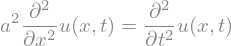

In [1]:
import sympy as sp
sp.init_printing()

# definindo variáveis e funções simbólicas
x, t = sp.symbols('x, t')
a = sp.symbols('a', positive=True)

u = sp.Function('u')(x, t)

# definindo a equação da onda
eq_onda = sp.Eq(a**2 * sp.Derivative(u, x, 2), sp.Derivative(u, t, 2))

eq_onda

<br>

## **Separação de variáveis**

Assumindo que a solução da equação diferencial é da forma

$$u(x, t) = X(x)T(t),$$

a equação é reescrita como

\begin{align}
a^2 \frac{\partial^2 (XT)}{\partial x^2}&=\frac{\partial^2 (XT)}{\partial t^2}\\\\
\implies a^2 X''T&=XT''\\\\
\implies \frac{X''}{X} &= \frac 1{a^2}\frac{T''}{T}.
\end{align}


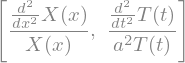

In [2]:
X = sp.Function('X')(x)
T = sp.Function('T')(t)

# separando as variáveis
sp.pde_separate(eq_onda, u, [X, T], strategy='mul')

<br>

O lado esquerdo da equação não depende de $t$ e o lado direito não depende de $x$, portanto ambos devem ser iguais a alguma constante $-\lambda$ (o sinal aqui é apenas uma questão de conveniência). Assim, obtemos as equações diferenciais ordinárias

$$\frac{X''}{X} = -\lambda, \quad \quad\frac{T''}{a^2T} = -\lambda.$$

<br>

Ambas essas equações possuem solução, mas precisamos satisfazer também as condições de contorno do problema. Descartando as soluções identicamente nulas $T(t)\equiv0$, as condições de contorno homogêneas ficam

$$u(0, t) = 0,\ \ \forall t>0 \quad\implies\quad X(0)T(t)=0,\ \ \forall t>0 \quad\implies\quad X(0)=0$$
$$u(L, t) = 0,\ \ \forall t>0 \quad\implies\quad X(L)T(t)=0,\ \ \forall t>0 \quad\implies\quad X(L)=0,$$

e, analogamente,

$$u_t(x, 0) = 0,\ \ \forall x\in[0, L] \quad\implies\quad X(x)T'(0)=0,\ \ \forall x\in[0, L] \quad\implies\quad T'(0)=0.$$

<br>

Começamos pelo problema de valor inicial

$$
X'' = -\lambda X,\quad X(0)=0.
$$

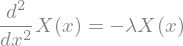

In [3]:
Lambda = sp.symbols('\lambda', integer=True, positive=True)

# definindo a EDO em X
edo_X = sp.Eq(sp.Derivative(X, x, 2), -Lambda*X)
edo_X

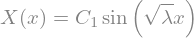

In [7]:
# resolvendo a EDO com a condição de contorno X(0)=0

sp.dsolve(edo_X, ics={X.subs(x, 0): 0})

Assim, vemos que a solução fundamental é

$$
X(x) = \sin(\sqrt{\lambda}x).
$$

Podemos agora consider a outra condição de contorno homogênea,

\begin{align}
&X(L) = 0 \\
\implies &\sin\big(\sqrt\lambda L\big) = 0,
\end{align}

para determinar os possíveis valores de $\lambda$.

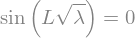

In [8]:
L = sp.symbols('L', positive=True)

# definindo a equação
eq_sin = sp.Eq(sp.sin(sp.sqrt(Lambda)*L), 0)

eq_sin

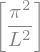

In [9]:
# resolvendo
sp.solve(eq_sin, Lambda)

Note que, quando resolvemos computacionalmente essa equação, o SymPy retorna apenas uma solução, $\big(\frac{\pi}{L}\big)^2$, referente a $n=1$. Mas a função seno se anula em todos os múltiplos inteiros de $\pi$, logo os possíveis valores de $\lambda$ são

$$ \lambda = \Big(\frac{n\pi}{L}\Big)^2,\quad n=1,2,3,...\ .$$

<br>

Assim, as respectivas soluções fundamentais são da forma

\begin{align}
X_n(x) &= \sin(\sqrt{\lambda}x),\\
&= \sin\Big(\frac{n\pi x}{L}\Big),\quad n=1,2,3,...\ .
\end{align}

<br>

***

<br>

Substituindo $\lambda = \big(\frac{n\pi}{L}\big)^2$ na outra EDO, obtemos

$$
T_n'' = -a^2\Big(\frac{n\pi}{L}\Big)^2T_n,\quad n=1,2,3,...\ ,
$$

cuja solução deve satisfazer a condição inicial

$$T'(0) = 0.$$

Resolvendo:

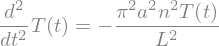

In [10]:
n = sp.symbols('n', integer=True, positive=True)

# definindo a EDO em T
edo_T = sp.Eq(sp.Derivative(T, t, 2), -(a*n*sp.pi/L)**2 * T)
edo_T

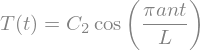

In [11]:
# obtendo a solução geral da EDO com a condição inicial T'(0)=0

sp.dsolve(edo_T, ics={T.diff(t).subs(t, 0): 0})

<br>

Assim, as soluções fundamentais da equação da onda $a^2 \frac{\partial^2 u}{\partial x^2}=\frac{\partial^2 u}{\partial t^2}$ com as condições de fronteira $u(0, t) = 0$ e $u(L, t) = 0$ para $t>0$ e $u_t(x, 0)=0$ para $x\in[0, L]$ são

<br>

\begin{align}
u_n(x, t) &= X_n(x)T_n(t) \\\\
& = \sin\Big(\frac{n\pi x}{L}\Big)\cos\Big(\frac{n\pi a t}{L}\Big),
\end{align}
para $n=1,2,3,...$.

<br>

Como a equação é linear e as condições consideradas são todas homogêneas, a <u>solução geral</u> é dada pelas combinações lineares das soluções fundamentais,

$$
u(x, t) = \sum_{n=1}^\infty c_n \sin\Big(\frac{n\pi x}{L}\Big)\cos\Big(\frac{n\pi a t}{L}\Big),
$$

onde $c_n\in\mathbb R$.

<br>

Podemos determinar esses escalares utilizando a condição de fronteira restante,

$$
u(x, 0) = f(x),
$$

donde obtemos

\begin{align}
u(x, 0) &= \sum_{n=1}^\infty c_n \sin\Big(\frac{n\pi x}{L}\Big)\cos\Big(\frac{n\pi a\cdot 0}{L}\Big)\\\\
\implies f(x) &= \sum_{n=1}^\infty c_n \sin\Big(\frac{n\pi x}{L}\Big).
\end{align}

Ou seja, os coeficientes $c_n$ que restam ser determinados são exatamente os **coeficientes da série de Fourier de senos da função $f$** em $[0, L]$, que são dados por

$$
c_n = \frac{2}{L}\int_{0}^L f(x)\sin\Big(\frac{n\pi x}{L}\Big)dx.
$$


<br><br>

***

<br><br>


## **Exemplo 1**

Considere uma corda elástica de comprimento $L = 30$ que satisfaz a equação de onda, com $a=2$. Suponha que cada extremidade da corda está fixa, que a corda é colocada em movimento a partir do repouso na posição dada por

$$u(x, 0) = f(x) = -\frac{x(x-30)}{25}.$$


<br>

Do raciocício acima, temos que a solução analítica do problema é
$$
u(x, t) = \sum_{n=1}^\infty c_n \sin\Big(\frac{n\pi x}{30}\Big)\cos\Big(\frac{2\pi nt}{30}\Big),
$$

com os coeficientes dados por

\begin{align}
c_n &= \frac{2}{30}\int_{0}^{30} \frac{-x(x-30)}{25}\sin\Big(\frac{n\pi x}{30}\Big)dx.
\end{align}

<br>

Vamos determinar uma aproximação para a solução analítica do problema acima utilizando 50 termos da série de Fourier e plotar o seu gráfico tridimensional, mostrando os primeiros $20s$.

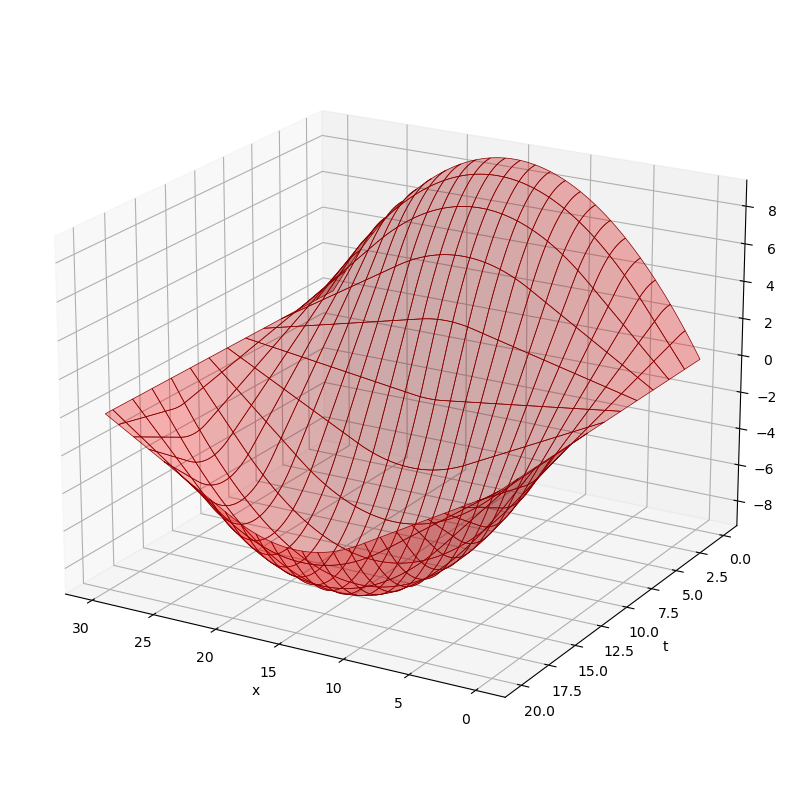

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# número de termos da série de Fourier
n_max = 40

def u_aprox(x, t):
  soma = 0
  for n in range(1, n_max):
    integrando = lambda x: -x*(x- 30)*np.sin(n*np.pi*x/30)/25      # definindo a função a ser integrada
    cn = (2/30)*quad(integrando,  0, 30)[0]                          # calculando o coeficiente de Fourier
    soma += cn*np.sin(n*np.pi*x/30)*np.cos(2*np.pi*n*t/30)          # montando a série truncada
  return soma

# definindo as coordenadas dos pontos do gráfico
x = np.linspace(0, 30, 200)
y = np.linspace(0, 20, 100)
xx, yy = np.meshgrid(x, y)
zz = u_aprox(xx, yy)

# plotando a superfície 3D
ax = plt.figure(figsize=(10, 20)).add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, color='red', edgecolor='darkred', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax.view_init(20, 120)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<br>

Marcando o tempo discretizado, podemos representar mais claramente o perfil da corda em diferentes instantes de tempo:

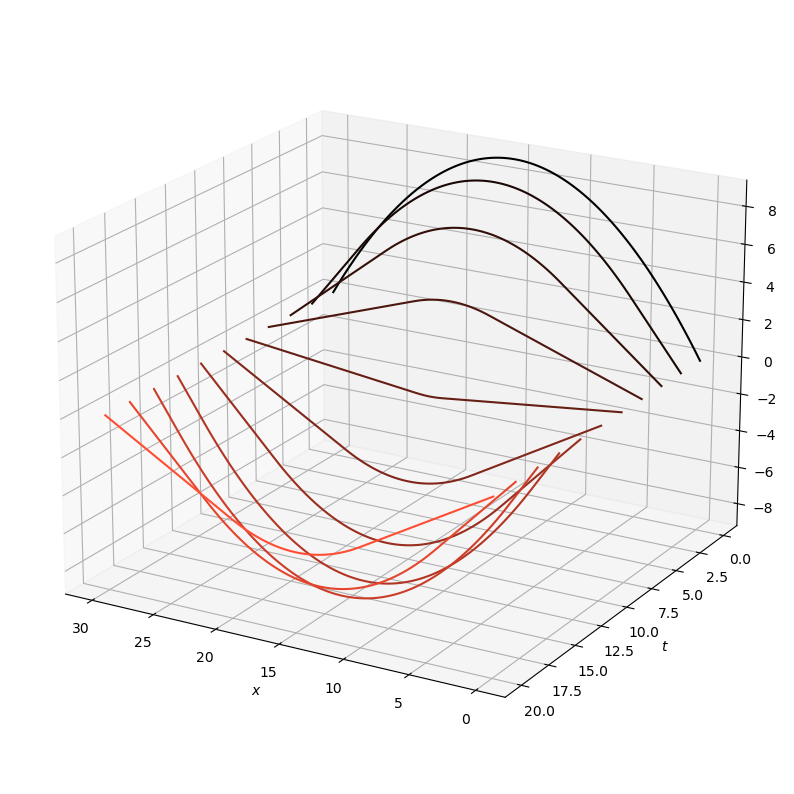

In [32]:
fig = plt.figure(figsize=(10, 20))
# plotando eixos tridimensionais
ax = plt.axes(projection='3d')

# discretização da corda
x = np.linspace(0, 30, 100)

tmax = 20

for k in np.linspace(0, tmax, 11):
  t = k * np.ones(np.shape(x))
  ax.plot3D(x, t, u_aprox(x, t), color=(round(k/tmax, 4), 0.3*round(k/tmax, 4), 0.2*round(k/tmax, 4)))

ax.view_init(20, 120)
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.show()

***

<br><br>

# <center><u>**Equação da Onda - Resolução numérica**</u></center>

Para resolver a equação numericamente, começamos discretizando tanto o comprimento da corda. Isto é, dividimos o comprimento $L$ em $n+1$ pontos equidistantes, aproximando

$$x\in[0, L]\quad \rightsquigarrow \quad x\in\{0=x_0,x_1,...,x_n=L\},$$

com $x_0=0$, $x_n=L$ e um passo de

$$
h_x = \frac{L}{n}.
$$

Analogamente, fixamos um tempo máximo $t_{max}$ e discretizamos em $m+1$ pontos

$$t\in[0, t_{max}] \quad \rightsquigarrow \quad t\in\{0=t_0, t_1,...,t_m = t_{max}\}$$

com um passo uniforme $$h_t = \frac{t_{max}}{m}.$$

<br>

## **Diferenças finitas**

Representando as imagens da solução $u$ nos pontos da malha discretizada por

$$u(x_i, t_j) \equiv u_{ij},$$

podemos utilizar diferenças finitas para aproximar a segunda derivada no espaço nos pontos da discretização por

$$
\color{red}{\frac{\partial^2u}{\partial x^2}(x_i, t_j) \approx \frac{u_{i+1, j} -2 u_{i, j} + u_{i-1, j}}{h_x^2}}
$$

e a segunda derivada no tempo por

$$
\color{blue}{\frac{\partial^2 u}{\partial t^2}(x_i, t_j) \approx \frac{u_{i, j+1} -2 u_{i, j} + u_{i, j-1}}{h_t^2}}.
$$

<br>

Assim, a equação da onda $a^2 \color{red}{\frac{\partial^2 u}{\partial x^2}}=\color{blue}{\frac{\partial^2 u}{\partial t^2}}$ nos pontos $(x_i, t_j)$ pode ser aproximada por

$$
a^2 \color{red}{\frac{u_{i+1, j} -2 u_{i, j} + u_{i-1, j}}{h_x^2}} = \color{blue}{\frac{u_{i, j+1} -2 u_{i, j} + u_{i, j-1}}{h_t^2}},
$$

que podemos reescrever como

\begin{align}
u_{i, j+1} = \lambda^2 u_{i+1, j} + (2-2\lambda^2)u_{i, j} + \lambda^2 u_{i-1, j} - u_{i, j-1},
\end{align}

onde

$$\lambda=\frac{a h_t}{h_x}.$$

<br>

Essas equações descrevem uma solução aproximada para pontos da discretização, exceto aqueles que já ficam definidos pelas condições iniciais. Por exemplo, os extremos da corda já ficam definidos por

$$u_{0, j} = u_{n, j} = 0,\quad \quad j=0,...,m\ ,$$

e a posição inicial da corda é definida por

$$u_{i, 0} = f(x_i),\quad\quad i = 1,...,n-1\ .$$

<br>

Sabendo que a velocidade inicial é dada por $u_t(x, 0) = g(x)$, podemos usar a aproximação

$$ u_t(x_i, t_j) \approx \frac{u_{i, j+1} - u_{i, j}}{h_t}$$

e escrever

\begin{align}
u_t(x_i, 0) &\approx \frac{u_{i, 1} - u_{i, 0}}{h_t}\\
\implies \quad g(x_i) &\approx \frac{u_{i, 1} - f(x_i)}{h_t},
\end{align}

logo

$$u_{i, 1} = g(x_i)h_t + f(x_i),\quad \forall i=1,...,n-1.$$

<br>

Para $0 < i < n$ e $j>1$, a fórmula de recursão acima indica que podemos determinar o valor de $u_{i,j}$ resolvendo o sistema

$$
\begin{pmatrix} u_{1, j+1}\\ u_{2, j+1}\\ \\ \vdots\\ \\ \\ u_{n-1, j+1}\end{pmatrix} = \begin{pmatrix}
(2-2\lambda^2)&\lambda^2&0&\ldots&0\\
\lambda^2&(2-2\lambda^2)&\lambda^2&\ldots&0\\
0&&\ddots&&0\\
\vdots&&&&\vdots\\
0&\ldots&\lambda^2&(2-2\lambda^2)&\lambda^2\\
0&\ldots&0&\lambda^2&(2-2\lambda^2)\\
\end{pmatrix}
\begin{pmatrix} u_{1, j}\\ u_{2, j}\\ \\ \vdots\\ \\ \\ u_{n-1, j}\end{pmatrix} -
\begin{pmatrix} u_{1, j-1}\\ u_{2, j-1}\\ \\ \vdots\\ \\ \\ u_{n-1, j-1}\end{pmatrix}.
$$

<br>

Assim, obtemos um sistema linear nas incógnitas $u_{i, j}$ que, junto às condições iniciais do problema, pode ser resolvido, por exemplo, pelo **método iterativo de Gauss-Seidel**.

<br>

***
***

**<u>Estabilidade</u>: Podemos mostrar que esse método é estável se $\lambda \leq 1$.**

***
***

<br>

## **Voltando ao Exemplo 1**

Vamos resolver numericamente a equação da onda $4u_{xx}=u_{tt}$ associada a uma corda elástica de $30$cm de comprimento, cujas extremidades são mantidas fixas ($u(0, t) = u(30, t) = 0,\ \forall t\geq0$), que parte do repouso ($u_t(x, 0) = 0,\ \forall x\in[0, 30]$ ) e cuja posição inicial é $u(x, 0) = -\frac{x(x-30)}{25}$.

Vamos utilizar uma discretização com passos $h_x=1cm$ e $h_t=0.5s$.

<br>

Vejamos o parâmetro $\lambda$ correspondente.

In [25]:
# definindo hx, ht e a
hx = 1 
ht = 0.5
a = 2

Lambda = a * ht / hx

print(Lambda)

1.0


<br>

Como $\lambda = 1$, o método é estável.

<br>

Procedemos definindo a discretização e utilizando a aproximação dada pelo método das diferenças finitas, estudada até $t_{max}=20s$.

35


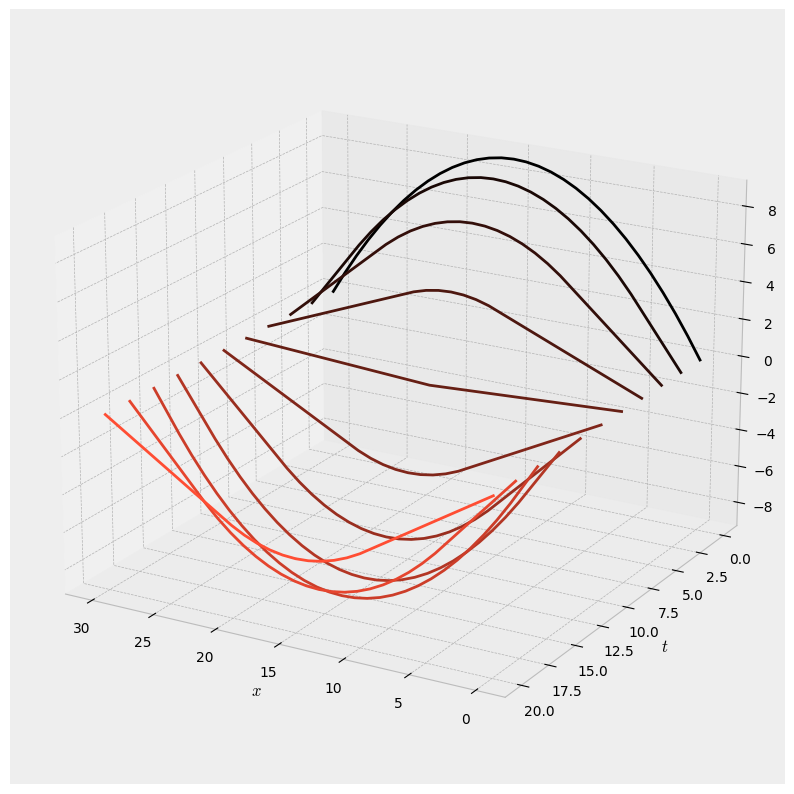

In [31]:
# comprimento da barra, em cm
L = 30
# pontos da discretização da barra
xi = np.arange(0, L+hx, hx)

# tempo máximo, em segundos
tmax = 20

# pontos da discretização temporal
tj = np.arange(0, tmax+ht, ht)

# inicializando o array da solução aproximada
u = np.zeros((len(xi), len(tj)))

# condições iniciais nas extremidades
u[0, :] = 0
u[-1, :] = 0

# condições em t=0: u[i, 0] = f(i)
for i in range(1, len(xi)-1):
  u[i, 0] = -i*(i-30)/25

# condições em t=1: partindo do repouso, u[i, 1] = g(i)*ht + f(i), com g=0
for i in range(1, len(xi)-1):
  u[i, 1] = -i*(i-30)/25

iter = 0

# iterando o método de Gauss-Seidel
tol = 0.01
err = tol + 1
while err > tol:
  u_ant = np.copy(u)
  for i in range(1, len(xi)-1):
    for j in range(1, len(tj)-1):
      u[i, j+1] = (2 - 2*Lambda**2) * u[i, j] + Lambda**2 * (u[i+1, j] + u[i-1, j]) - u[i, j-1]
  err = np.linalg.norm(u - u_ant)
  iter = iter + 1

print(iter)    
    
# plotando
fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection='3d')
# agrupando os passos temporais de 4 em 4
for j in range(len(tj[::4])):
  t = tj[j*4] * np.ones(np.shape(xi))
  ax.plot3D(xi, t, u[:, j*4], color=(round(tj[j*4]/tmax, 4), 0.3*round(tj[j*4]/tmax, 4), 0.2*round(tj[j*4]/tmax, 4)))

ax.view_init(20, 120)
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.show()

***

<br>



## **Exercício 1**

(a) Determine a solução analítica do problema

$$\frac{\partial^2 u}{\partial x^2} - \frac{\partial^2 u}{\partial t^2} = 0, \quad 0 < x < 1,\quad t>0$$

$$u(0, t) = u(1, t) = 0,\quad \forall t>0$$

$$u(x, 0) = \sin(\pi x), \quad \forall x\in[0, 1]$$

$$u_t(x, 0) = 0,\quad \forall x\in[0,1]$$

e plote seu gráfico, considerando 5 termos na série de Fourier.

Para resolver analiticamente, aplicamos separação de variáveis. Assumindo que $u(x,y)= X(x)T(t)$, e substituindo na equação da onda, obtemos:

$$
X''(x)T(t)-X(x)T''(t) = 0 \Rightarrow \frac{X''(x)}{X(x)} = \frac{T''(t)}{T(t)} = -\lambda
$$

Temos, assim, duas equações diferenciais ordinárias:

$$
X''(x) + \lambda X(x) = 0
$$

com condições de contorno $X(0) = 0 = X(1)$, e

$$
T''(t) + \lambda T(t) =0.
$$





In [8]:
# Resolvendo a primeira equação:

import sympy as sp

Lambda = sp.symbols('\lambda', integer=True, positive=True)
x = sp.symbols('x')
X = sp.Function('X')(x)

# definindo a EDO em X
edo_X = sp.Eq(sp.Derivative(X, x, 2), -Lambda*X)
edo_X

Eq(Derivative(X(x), (x, 2)), -\lambda*X(x))

In [10]:
# resolvendo a EDO 

sol_geral = sp.dsolve(edo_X).rhs
sol_geral

C1*sin(sqrt(\lambda)*x) + C2*cos(sqrt(\lambda)*x)

In [11]:
# Aplicando as condições de contorno X(0)=0=X(1)

x, C1, C2 = sp.symbols('x C1 C2')

eq_geral = C1*sp.sin(sp.sqrt(Lambda)*x) + C2*sp.cos(sp.sqrt(Lambda)*x)
eq_geral

eq1 = sp.Eq(eq_geral.subs(x, 0), 0)
eq1

Eq(C2, 0)

In [12]:

# substitui C2
sol_parcial = eq_geral.subs(C2, 0)

# aplica a condição de contorno X(1) = 0
eq2 = sp.Eq(sol_parcial.subs(x, 1), 0)
eq2

Eq(C1*sin(sqrt(\lambda)), 0)

Aqui, temos, para a solução não trivial:

$$
\sqrt{\lambda} = n\pi\hspace{0.3cm} n\in \{1,2, 3, \cdots\}
$$
$$
\Rightarrow \lambda = (n\pi)^2
$$

Aqui tomamos $n$ positivo, pois como $-\sin(x) = \sin(-x)$, a constante absorve o sinal negativo. Logo, a solução final é:


$$
\boxed{X_n(x) = C_n \sin(n\pi x)}
$$

Agora, substituindo $\lambda = (n\pi)^2$ na segunda EDO, temos:

$$
T''(t) + (n\pi)^2 T(t) = 0
$$

Pela equação característica:

$$
r^2 + (n\pi)^2 = 0 \Rightarrow r = \pm \sqrt{-(n\pi)^2} = \pm i (n\pi)
$$

Como as raízes são complexas e puramente imaginárias, a solução será dada por uma combinação de senos e cossenos:

$$
T_{n} (t) = A_n \cos(n\pi t) + B_{n}\sin(n\pi t)
$$

com $A_n$ e $B_n$ constantes dadas pelas condições iniciais.

A solução geral de $u(x, t)$ é a superposição de todas as soluções possíveis:

$$
u(x,t) = \sum_{n=1}^{\infty} u_{n}(x,t) = \sum_{n=1}^{\infty}X_{n}(x)T_{n}(t)
$$

$$
\Rightarrow u(x,t) = \sum_{n=1}^{\infty} (A_{n}\cos(n\pi t) + B_{n}\sin(n\pi t))\sin(n\pi x)
$$

Aplicando a condição inicial $u_t (x,0) = 0$, temos:

$$
\frac{\partial u}{\partial t} = \sum_{n=1}^{\infty} (-n\pi A_{n}\sin(n\pi t) + n\pi B_{n} \cos(n\pi t))\sin(n\pi x)
$$

$$
\Rightarrow u_{t}(x,0) = \sum_{n=1}^{\infty} (-n\pi A_{n}\sin(0) + n\pi B_{n} \cos(0))\sin(n\pi x) = \sum_{n=1}^{\infty} (n\pi B_{n})\sin(n\pi x) = 0
$$

Disso, resulta:

$$
n\pi B_{n} = 0 \Rightarrow B_{n} = 0
$$

e

$$
u(x,t) = \sum_{n=1}^{\infty}A_{n}\cos(n\pi t)\sin(n\pi x)
$$

Aplicando a condição em $t=0$:

$$
u(x,0) = \sum_{n=1}^{\infty}A_{n}\cos(0)\sin(n\pi x) = \sum_{n=1}^{\infty}A_{n}\sin(n\pi x)
$$


$$
\Rightarrow \sum_{n=1}^{\infty}A_{n}\sin(n\pi x) = \sin(\pi x)
$$

Dessa igualdade, temos:

$$
\begin{cases}
A_1 = 1
\\
A_2 = A_3 = \cdots = 0
\end{cases}
$$

Portanto:

$$ u(x,t) = 1\cdot \cos(1\cdot \pi t)\sin(1 \cdot \pi x) $$

$$
\boxed{\therefore u(x,t) = \cos(\pi t)\sin(\pi x) }
$$

Nesse caso, apenas o primeiro coeficiente da série é não nulo. 

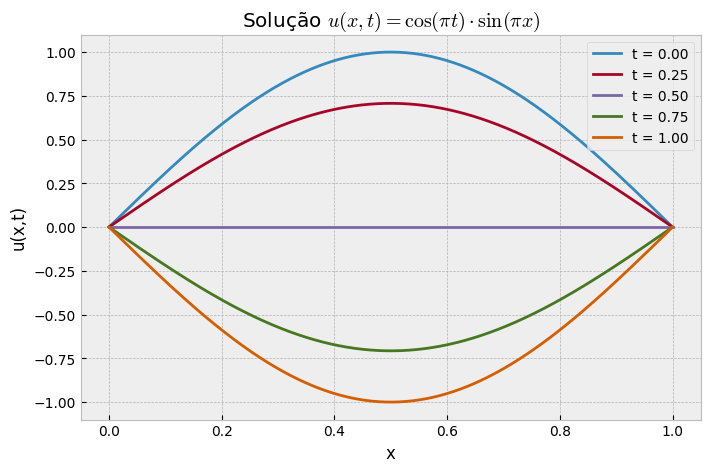

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Domínio 
x = np.linspace(0,1,500)

# Tempos
times = [0, 0.25, 0.5, 0.75, 1.0]

plt.style.use('bmh')
plt.figure(figsize=(8,5))

for t in times:
    u = np.cos(np.pi*t) * np.sin(np.pi*x)
    plt.plot(x, u, label=f"t = {t:.2f}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solução $u(x,t) = \cos(\pi t) \cdot \sin(\pi x)$")
plt.legend()
plt.grid(True)
plt.show()


<br>

(b) Construa uma aproximação numérica para a solução do problema baseada no método das diferenças finitas e no método de Gauss-Seidel, utilizando uma discretização com 9 pontos espaciais, 11 pontos temporais e um tempo máximo de $t_{max} = 1$s.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros
L = 1.0 # comprimento L
Nx = 9 # pontos espaciais
hx = L / (Nx - 1) # passos no espaço
tmax = 1.0 # tempo máximo
Nt = 11 # pontos temporais
ht = tmax / (Nt - 1) # passos no tempo
xi = np.linspace(0, L, Nx) # intervalo no espaço
tj = np.linspace(0, tmax, Nt) # intervalo no tempo
Lambda_sq = (ht / hx)**2 # lambda ao quadrado


# matriz da solução (Nx linhas e Nt colunas)
u = np.zeros((Nx, Nt))

# condição u(x, 0) = sin(pi x)
u[:, 0] = np.sin(np.pi * xi) 

u[0, :] = 0.0 # u(0, t) = 0 
u[-1, :] = 0.0 # u(1, t) = 0

# u'_(t) (x, 0) = 0
u[1:-1, 1] = (1 - Lambda_sq) * u[1:-1, 0] + (Lambda_sq / 2) * (u[2:, 0] + u[0:-2, 0])


# Iteração no tempo
for j in range(1, Nt - 1):
    u[1:-1, j+1] = 2 * (1 - Lambda_sq) * u[1:-1, j] + Lambda_sq * (u[2:, j] + u[0:-2, j]) - u[1:-1, j-1] # fórmula de recorrência
    # aqui já está sendo calculado sobre todos os valores de Nx, pela própria fórmula recursiva
    # assim, não é usado dois for loops - computacionalmente mais eficiente
    # o while externo também não é usado, pois ele apenas gera um cálculo redundante
    # a matriz é calculada diretamente, o que deixa de fazer sentido o uso do método de Gauss-Seidel

    
print("Matriz da Solução Numérica u(x,t):\n")
print(np.round(u, 4)) # 4 casas decimais

Matriz da Solução Numérica u(x,t):

[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.3827  0.364   0.3099  0.2256  0.1193  0.0014 -0.1167 -0.2233 -0.3083
  -0.3632 -0.3827]
 [ 0.7071  0.6727  0.5727  0.4169  0.2205  0.0026 -0.2155 -0.4127 -0.5696
  -0.671  -0.7071]
 [ 0.9239  0.8789  0.7482  0.5447  0.2881  0.0034 -0.2816 -0.5392 -0.7442
  -0.8768 -0.9239]
 [ 1.      0.9513  0.8099  0.5896  0.3118  0.0037 -0.3048 -0.5836 -0.8056
  -0.949  -1.    ]
 [ 0.9239  0.8789  0.7482  0.5447  0.2881  0.0034 -0.2816 -0.5392 -0.7442
  -0.8768 -0.9239]
 [ 0.7071  0.6727  0.5727  0.4169  0.2205  0.0026 -0.2155 -0.4127 -0.5696
  -0.671  -0.7071]
 [ 0.3827  0.364   0.3099  0.2256  0.1193  0.0014 -0.1167 -0.2233 -0.3083
  -0.3632 -0.3827]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]]


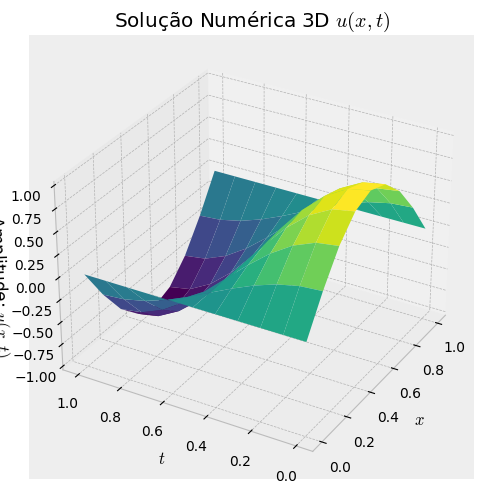

In [57]:
# Solução 3D
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot(111, projection='3d')

X, T = np.meshgrid(xi, tj)
ax1.plot_surface(X, T, u.T, cmap='viridis', rstride=1, cstride=1, edgecolor='none')
ax1.set_title('Solução Numérica 3D $u(x,t)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$t$')
ax1.set_zlabel('Amplitude: $u(x,t)$')
ax1.view_init(30, -150)

plt.tight_layout()
plt.show()

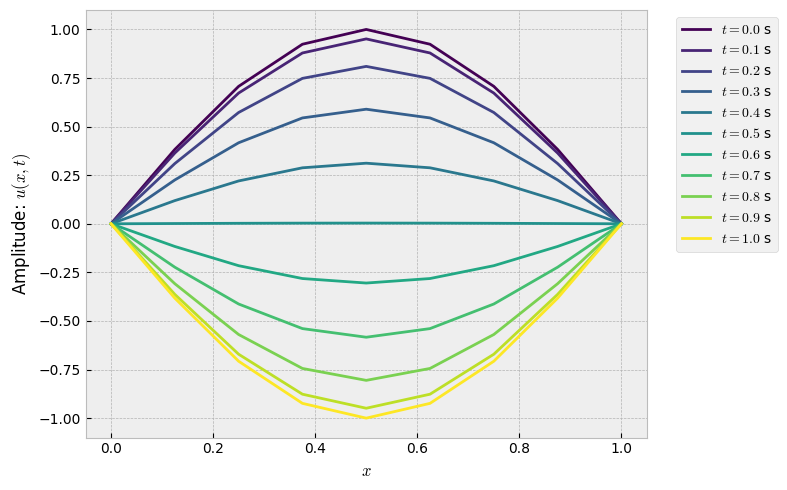

In [54]:
# 2D
fig2 = plt.figure(figsize=(8, 5))
ax2 = fig2.add_subplot(111)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$u(x,t)$')
ax2.grid(True)

for j in range(Nt):
    color_val = plt.cm.viridis(j / (Nt - 1))
    ax2.plot(xi, u[:, j], label=f'$t={tj[j]:.1f}$ s', color=color_val)

# ax2.legend(bbox_to_anchor=(1.04, 1), loc='upper left') 

plt.tight_layout()
plt.show()

<br>

## **Exercício 2**

(a) Determine uma aproximação numérica para a solução da equação da onda

$$\frac{\partial^2 u}{\partial t^2} - \frac{1}{16\pi^2}\frac{\partial^2 u}{\partial x^2} = 0, \quad 0 < x < 0.5,\quad t>0$$

$$u(0, t) = u(0.5, t) = 0,\quad \forall t>0$$

$$u(x, 0) = 0, \quad \forall x\in[0, 0.5]$$

$$u_t(x, 0) = \sin(4\pi x),\quad \forall x\in[0,0.5].$$

lambda^2 = 0.000063


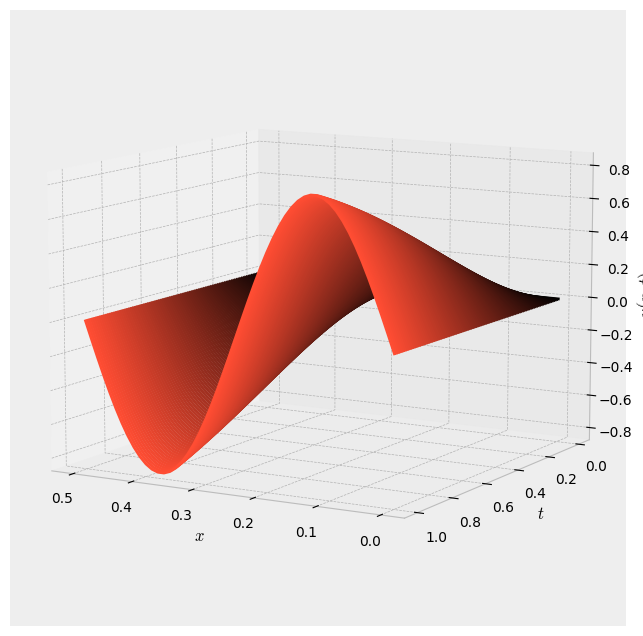

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros
L = 0.5   # comprimento da barra
hx = 0.01 # passo espacial
ht = 0.001 # passo temporal
c2 = 1/(16*np.pi**2)

# malhas
xi = np.arange(0, L+hx, hx)
tj = np.arange(0, 1+ht, ht)  # tempo até t=1s

# lambda^2
Lambda2 = c2 * ht**2 / hx**2

print(f"lambda^2 = {Lambda2:.6f}")

# solução aproximada
u = np.zeros((len(xi), len(tj)))

# condição inicial u(x,0)=0 já é satisfeita

# condição u_t = sin(4pi x)
for i in range(1, len(xi)-1):
    u[i,1] = ht * np.sin(4*np.pi*xi[i])

# evolução no tempo
for n in range(1, len(tj)-1):
    u[1:-1, n+1] = (2*u[1:-1, n] - u[1:-1, n-1] + Lambda2*(u[2:, n] - 2*u[1:-1, n] + u[0:-2, n]))

# plotagem
plt.style.use('bmh')
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# cores ao longo do tempo
for k in range(0, len(tj), 10):
    t = tj[k]*np.ones_like(xi)
    ax.plot3D(xi, t, u[:,k], color=(round(tj[k]/tj[-1],3), 0.3*round(tj[k]/tj[-1],3), 0.2*round(tj[k]/tj[-1],3)))

ax.set_zlabel('$u(x,t)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.view_init(elev=10, azim=120)

plt.show()

<br>

(b) Compare graficamente seu resultado com a solução exata

$$u(x, t) = \sin(t)\sin(4\pi x)$$

no instante $t=0.5s$.

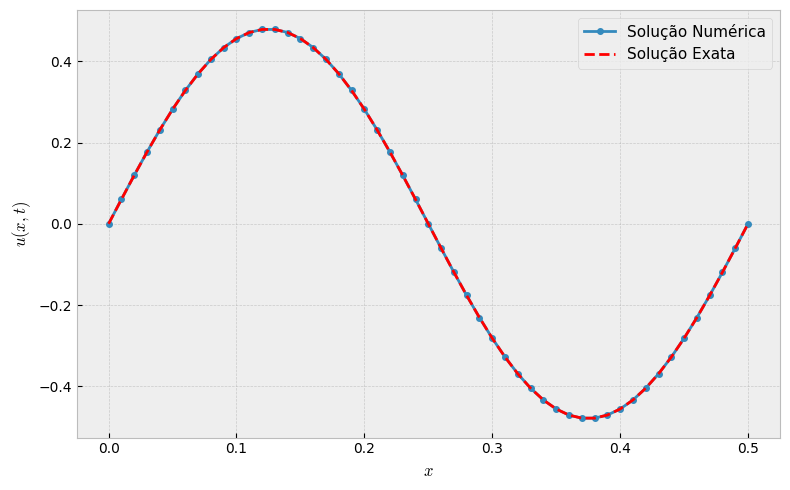

In [16]:
# índice do tempo mais próximo de 0.5s
idx = np.argmin(np.abs(tj - 0.5))

# valor numérico
u_numerico = u[:, idx]

# valor exato
u_exato = np.sin(0.5) * np.sin(4 * np.pi * xi)

# gráfico de comparação
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.plot(xi, u[:, idx], 'o-', label='Solução Numérica', markersize=4, lw=2) # valor numérico
plt.plot(xi, u_exato, '--', label='Solução Exata', lw=2, color='red') # valor exato
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$u(x,t)$', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<br>

(c) Compute o erro médio cometido pela aproximação no instante $t=0.5s$.

In [23]:
erro_absoluto = np.abs(u_numerico - u_exato)
erro_medio = np.mean(erro_absoluto)

print(f"Erro médio (t=0.5s): {erro_medio:.6e}")

Erro médio (t=0.5s): 1.670533e-05


<br>

***
***

<br>

### **Referências:**
(Você pode acessá-las seguindo: Portal > Institucional > Biblioteca > Recursos eletrônicos > Minha biblioteca e então clicando nos links abaixo.)

Chapra e Canale, [Métodos numéricos para engenharia](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/825).

Burden e Faires, [Análise numérica](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/851).

Boyce e Diprima, [Equações diferenciais elementares e problemas de valores de contorno](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/2[%3Bvnd.vst.idref%3Dcover]!/4/2/2%4051:33).